In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import GAT, GCN, WeightedGCN


%load_ext autoreload
%autoreload 2

NUM_EXPERIMENTS = 5
set_all_seeds(seed=4)

## Original Graphs Without Weights

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN Without Weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2397
MSE: 0.2197
Epoch 00002 | Loss: 0.2388
Epoch 00003 | Loss: 0.2475
Epoch 00004 | Loss: 0.2065
Epoch 00005 | Loss: 0.2414
Epoch 00006 | Loss: 0.1989
MSE: 0.1797
Epoch 00007 | Loss: 0.2088
Epoch 00008 | Loss: 0.2220
Epoch 00009 | Loss: 0.2364
Epoch 00010 | Loss: 0.2362
Epoch 00011 | Loss: 0.2349
MSE: 0.2197
Epoch 00012 | Loss: 0.2360
Epoch 00013 | Loss: 0.1956
Epoch 00014 | Loss: 0.1812
Epoch 00015 | Loss: 0.1731
Epoch 00016 | Loss: 0.1834
MSE: 0.3624
Epoch 00017 | Loss: 0.1826
Epoch 00018 | Loss: 0.1977
Epoch 00019 | Loss: 0.1783
Epoch 00020 | Loss: 0.1920
Epoch 00021 | Loss: 0.1886
MSE: 0.3329
Epoch 00022 | Loss: 0.2114
Epoch 00023 | Loss: 0.2381
Epoch 00024 | Loss: 0.2394
Epoch 00025 | Loss: 0.2394
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2395
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of GCN without weights-0 on the test set: 0.0838
MSE of GCN without weights-1 on the test set: 0.2490
MSE of GCN without weights-2 on the test set: 0.3040
MSE of GCN without weights-3 on the test set: 0.2266
MSE of GCN without weights-4 on the test set: 0.1987
OVERALL: MSE of GCN without weights on the test set: 0.2266


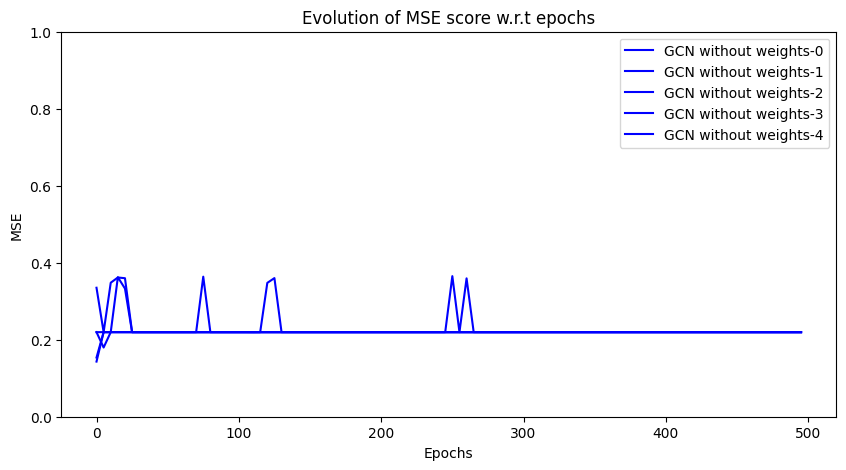

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GAT Without Weights

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3202
MSE: 0.3651
Epoch 00002 | Loss: 0.3237
Epoch 00003 | Loss: 0.3315
Epoch 00004 | Loss: 0.3331
Epoch 00005 | Loss: 0.3266
Epoch 00006 | Loss: 0.3307
MSE: 0.3651
Epoch 00007 | Loss: 0.3250
Epoch 00008 | Loss: 0.3307
Epoch 00009 | Loss: 0.3285
Epoch 00010 | Loss: 0.3262
Epoch 00011 | Loss: 0.3321
MSE: 0.3651
Epoch 00012 | Loss: 0.3288
Epoch 00013 | Loss: 0.3293
Epoch 00014 | Loss: 0.3260
Epoch 00015 | Loss: 0.3219
Epoch 00016 | Loss: 0.3316
MSE: 0.3651
Epoch 00017 | Loss: 0.3320
Epoch 00018 | Loss: 0.3276
Epoch 00019 | Loss: 0.3211
Epoch 00020 | Loss: 0.3186
Epoch 00021 | Loss: 0.3211
MSE: 0.3651
Epoch 00022 | Loss: 0.3176
Epoch 00023 | Loss: 0.2832
Epoch 00024 | Loss: 0.2461
Epoch 00025 | Loss: 0.2485
Epoch 00026 | Loss: 0.2503
MSE: 0.2197
Epoch 00027 | Loss: 0.2406
Epoch 00028 | Loss: 0.2409
Epoch 00029 | Loss: 0.2379
Epoch 00030 | Loss: 0.2378
Epoch 00031 | Loss: 0.2345
MSE: 0.2197
Epoch 00032 | Loss: 0.2348
Epoch 00033 | Loss: 0.2318
Epoch 00034

MSE of GAT without weights-0 on the test set: 0.2490
MSE of GAT without weights-1 on the test set: 0.3389
MSE of GAT without weights-2 on the test set: 0.2490
MSE of GAT without weights-3 on the test set: 0.0220
MSE of GAT without weights-4 on the test set: 0.2490
OVERALL: MSE of GAT without weights on the test set: 0.2490


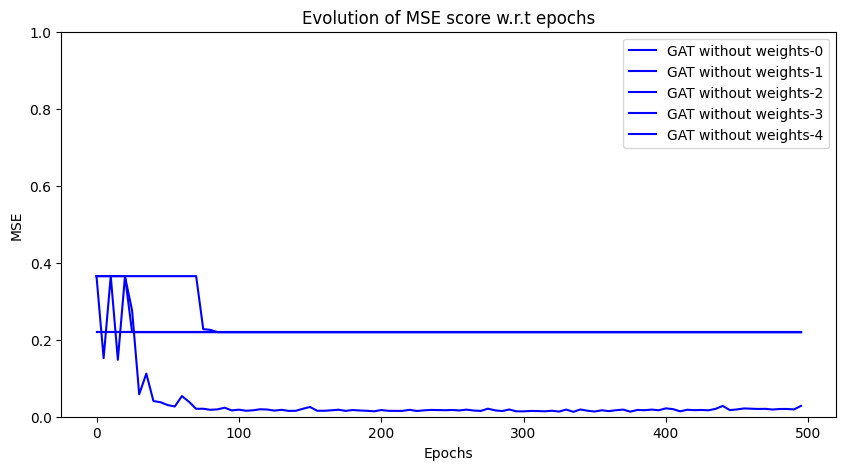

In [6]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs Without Weights

In [7]:
batch_size = 1
threshold = 30

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 1281], y=[359], x=[359, 8], edge_attr=[1281, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 338, 350, 354],
        [ 89, 183,   0,  ..., 338, 350, 354]])
Number of features per node:  8


### Sparsified GCN Without Weights

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1626
MSE: 0.2123
Epoch 00002 | Loss: 0.1549
Epoch 00003 | Loss: 0.1404
Epoch 00004 | Loss: 0.1413
Epoch 00005 | Loss: 0.1411
Epoch 00006 | Loss: 0.1403
MSE: 0.2179
Epoch 00007 | Loss: 0.1394
Epoch 00008 | Loss: 0.1405
Epoch 00009 | Loss: 0.1397
Epoch 00010 | Loss: 0.1421
Epoch 00011 | Loss: 0.1402
MSE: 0.2180
Epoch 00012 | Loss: 0.1408
Epoch 00013 | Loss: 0.1394
Epoch 00014 | Loss: 0.1426
Epoch 00015 | Loss: 0.1405
Epoch 00016 | Loss: 0.1432
MSE: 0.2163
Epoch 00017 | Loss: 0.1403
Epoch 00018 | Loss: 0.1396
Epoch 00019 | Loss: 0.1402
Epoch 00020 | Loss: 0.1396
Epoch 00021 | Loss: 0.1404
MSE: 0.2158
Epoch 00022 | Loss: 0.1398
Epoch 00023 | Loss: 0.1405
Epoch 00024 | Loss: 0.1408
Epoch 00025 | Loss: 0.1403
Epoch 00026 | Loss: 0.1397
MSE: 0.2206
Epoch 00027 | Loss: 0.1413
Epoch 00028 | Loss: 0.1444
Epoch 00029 | Loss: 0.1426
Epoch 00030 | Loss: 0.1390
Epoch 00031 | Loss: 0.1410
MSE: 0.2186
Epoch 00032 | Loss: 0.1392
Epoch 00033 | Loss: 0.1405
Epoch 00034

MSE of Sparsified GCN without weights-0 on the test set: 0.0210
MSE of Sparsified GCN without weights-1 on the test set: 0.0213
MSE of Sparsified GCN without weights-2 on the test set: 0.0221
MSE of Sparsified GCN without weights-3 on the test set: 0.0221
MSE of Sparsified GCN without weights-4 on the test set: 0.0238
OVERALL: MSE of Sparsified GCN without weights on the test set: 0.0221


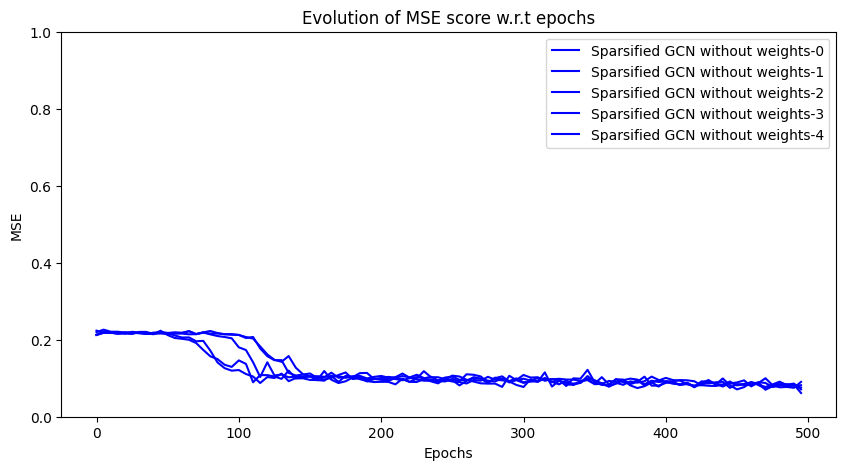

In [9]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GAT Without Weights

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3337
MSE: 0.3192
Epoch 00002 | Loss: 0.2604
Epoch 00003 | Loss: 0.2172
Epoch 00004 | Loss: 0.1779
Epoch 00005 | Loss: 0.1764
Epoch 00006 | Loss: 0.1588
MSE: 0.2161
Epoch 00007 | Loss: 0.1519
Epoch 00008 | Loss: 0.1474
Epoch 00009 | Loss: 0.1507
Epoch 00010 | Loss: 0.1537
Epoch 00011 | Loss: 0.1555
MSE: 0.2193
Epoch 00012 | Loss: 0.1447
Epoch 00013 | Loss: 0.1527
Epoch 00014 | Loss: 0.1493
Epoch 00015 | Loss: 0.1445
Epoch 00016 | Loss: 0.1427
MSE: 0.2178
Epoch 00017 | Loss: 0.1367
Epoch 00018 | Loss: 0.1349
Epoch 00019 | Loss: 0.1369
Epoch 00020 | Loss: 0.1379
Epoch 00021 | Loss: 0.1380
MSE: 0.2197
Epoch 00022 | Loss: 0.1396
Epoch 00023 | Loss: 0.1374
Epoch 00024 | Loss: 0.1347
Epoch 00025 | Loss: 0.1355
Epoch 00026 | Loss: 0.1372
MSE: 0.2177
Epoch 00027 | Loss: 0.1369
Epoch 00028 | Loss: 0.1390
Epoch 00029 | Loss: 0.1348
Epoch 00030 | Loss: 0.1373
Epoch 00031 | Loss: 0.1394
MSE: 0.2155
Epoch 00032 | Loss: 0.1377
Epoch 00033 | Loss: 0.1353
Epoch 00034

MSE of Sparsified GAT without weights-0 on the test set: 0.0234
MSE of Sparsified GAT without weights-1 on the test set: 0.0266
MSE of Sparsified GAT without weights-2 on the test set: 0.0216
MSE of Sparsified GAT without weights-3 on the test set: 0.0244
MSE of Sparsified GAT without weights-4 on the test set: 0.0238
OVERALL: MSE of Sparsified GAT without weights on the test set: 0.0238


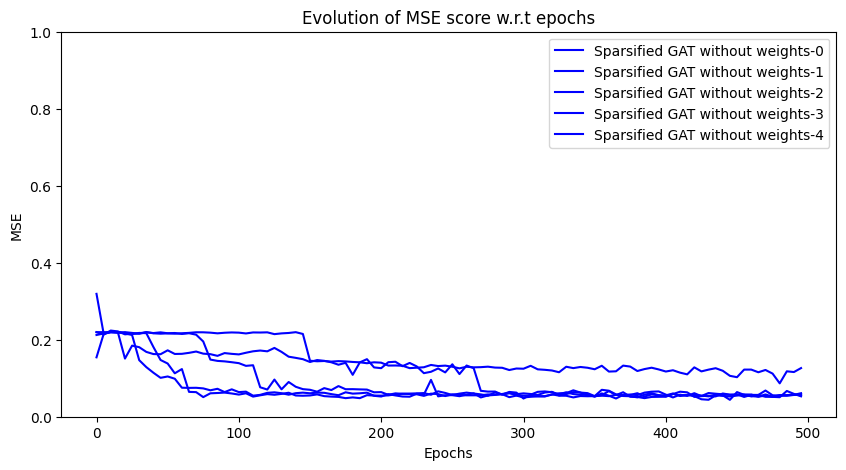

In [11]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Original Graphs With Weights

In [12]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN With Weights

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = WeightedGCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2395
MSE: 0.2197
Epoch 00002 | Loss: 0.2395
Epoch 00003 | Loss: 0.2395
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2395
Epoch 00010 | Loss: 0.2395
Epoch 00011 | Loss: 0.2395
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2395
Epoch 00014 | Loss: 0.2395
Epoch 00015 | Loss: 0.2395
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2395
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2395
MSE: 0.2197
Epoch 00022 | Loss: 0.2395
Epoch 00023 | Loss: 0.2395
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2395
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2395
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of GCN with weights-0 on the test set: 0.2490
MSE of GCN with weights-1 on the test set: 0.3389
MSE of GCN with weights-2 on the test set: 0.0132
MSE of GCN with weights-3 on the test set: 0.3389
MSE of GCN with weights-4 on the test set: 0.3389
OVERALL: MSE of GCN with weights on the test set: 0.3389


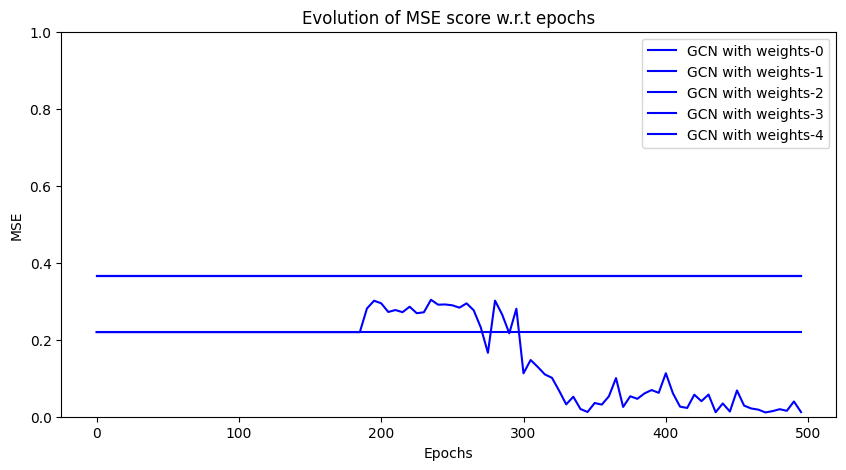

In [14]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)